<a href="https://colab.research.google.com/github/neal-logan/dsba6211-summer2024/blob/main/DSBA6211_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment

##Links

[Assignment Details](https://uncc.instructure.com/courses/229788/assignments/2181614)

[PiML Outcome Testing ](https://selfexplainml.github.io/PiML-Toolbox/_build/html/auto_examples/index.html#outcome-testing)

##Requirements:

*  Partial dependency plotsLinks to an external site. for all variables for both models; write 1 paragraph interpreting the plots (0.5 points)
*  3 outcome testsLinks to an external site. (choose 3 from accuracy, weakspot, overfit, reliability, robustness, or resilience) and write 1-2 sentences for each plot, interpretating the plots. (1.5 point)
*  Make a decision which model do you think you should use; provide justification and make your case. (0.5 points)

##Outline

1.   Setup code
2.   Partial Dependency Plots
3.   Outcome Test 1: WeakSpot
4.   Outcome Test 2: Robustness
5.   Outcome Test 3: Resilience
6.   Model Choice & Justification






# Setup Code

Install PiML
Key packages: Pandas, PiML

Run model

In [ ]:
#Install package
%pip install piml

In [ ]:

#Starting Code:

import pandas as pd
from piml import Experiment
from piml.models import XGB2Classifier

exp = Experiment()
data = pd.read_csv('https://github.com/shrutibalan4591/South-German-Credit-Risk-Classification/raw/main/Data/German_credit.csv')

prediction_features = list(data.columns)
excluded_features = ["amount", "savings", "employment_duration", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker"]
for feature in excluded_features:
    prediction_features.remove(feature)
prediction_features.remove("credit_risk")

exp.data_loader(data=data)
exp.data_summary(feature_exclude=excluded_features, silent=True)
exp.data_prepare(target="credit_risk", task_type="classification", silent=True)

# Train Model without monotonicity
exp.model_train(model=XGB2Classifier(), name='XGB2')

# Train Model with monotonicity constraints on duration
exp.model_train(model=XGB2Classifier(mono_decreasing_list=("duration", )), name="Mono-XGB2")

(CVXPY) Jun 18 09:24:04 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 18 09:24:04 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


#Partial Dependency Plots

In [ ]:
print(prediction_features)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

['status', 'duration', 'credit_history', 'purpose', 'installment_rate']


## Partial Dependency Plot - Status

The relationship between status and default is alrady linear and monotonic--no intervention is clearly necessary here.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

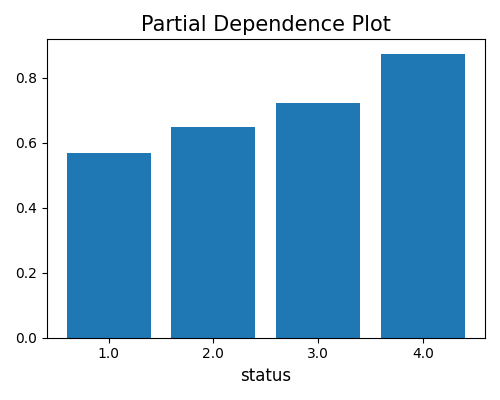

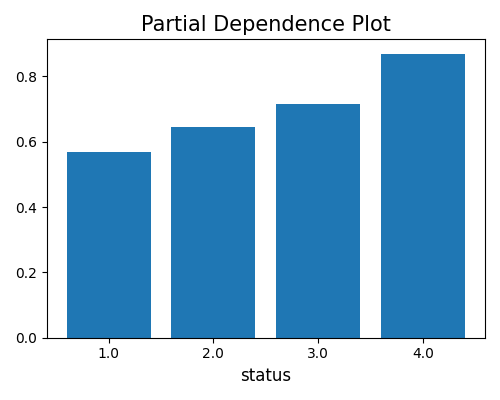

In [ ]:
#Partial Dependency Plot - status

exp.model_explain(model="XGB2", show="pdp", uni_feature='status',
                  grid_size=50, original_scale=True, figsize=(5, 4))

exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature='status',
                  grid_size=50, original_scale=True, figsize=(5, 4))



## Partial Dependency Plot - Duration

In the original model, the linear relationship was clear yet noisy. After applying the monotonic constraint to the duration variable, the new model shows a much smoother negative linear relationships.


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

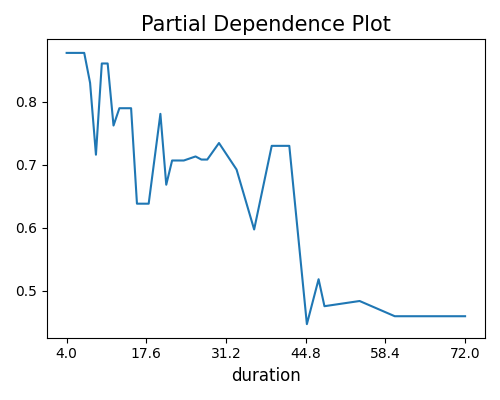

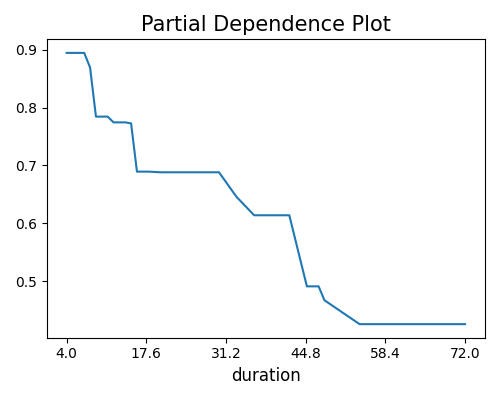

In [ ]:
#Partial Dependency Plot - duration
exp.model_explain(model="XGB2", show="pdp", uni_feature='duration',
                  grid_size=50, original_scale=True, figsize=(5, 4))

exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature='duration',
                  grid_size=50, original_scale=True, figsize=(5, 4))



## Partial Dependency Plot - Credit History

The relationship was not quite monotonic in the original model, but is in the updated model, for reasons that are not clear since we did not impose a monotonic constraint on this variable.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

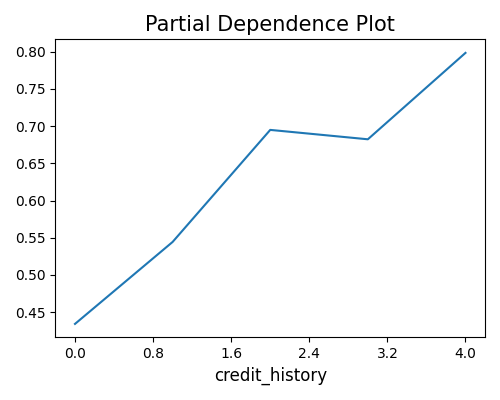

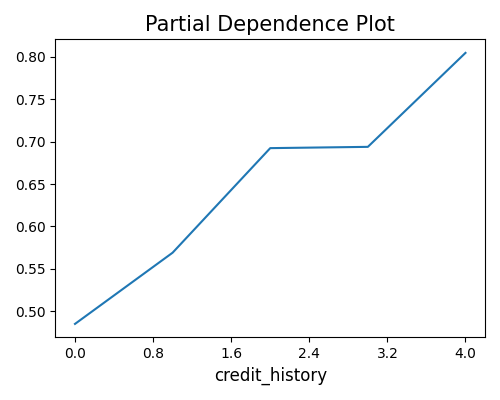

In [ ]:
#Partial Dependency Plot - credit_history
exp.model_explain(model="XGB2", show="pdp", uni_feature='credit_history',
                  grid_size=50, original_scale=True, figsize=(5, 4))

exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature='credit_history',
                  grid_size=50, original_scale=True, figsize=(5, 4))

## Partial Dependency Plot - Purpose

The relationship between purpose and default is not clear, and we'll want to take a look at how this is actually being used in the model.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

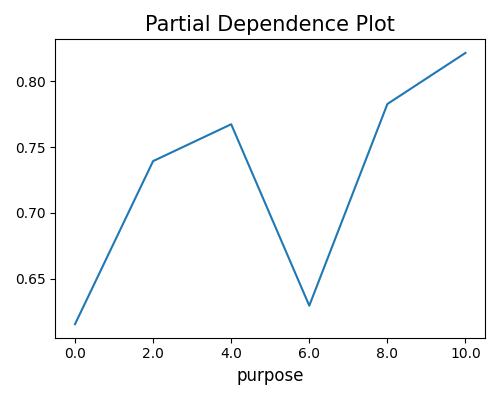

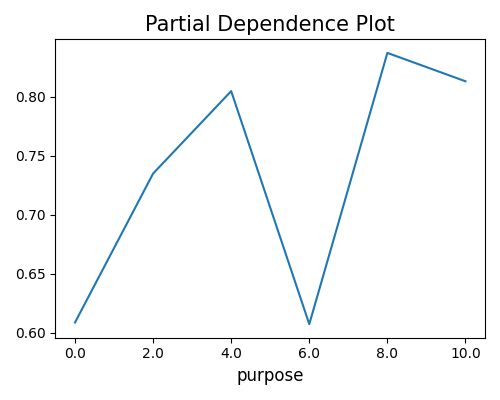

In [ ]:
#Partial Dependency Plot - purpose
exp.model_explain(model="XGB2", show="pdp", uni_feature='purpose',
                  grid_size=6, original_scale=True, figsize=(5, 4))

exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature='purpose',
                  grid_size=6, original_scale=True, figsize=(5, 4))

## Partial Dependency Plot - Installment Rate

The relationship is linear and monotonic.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

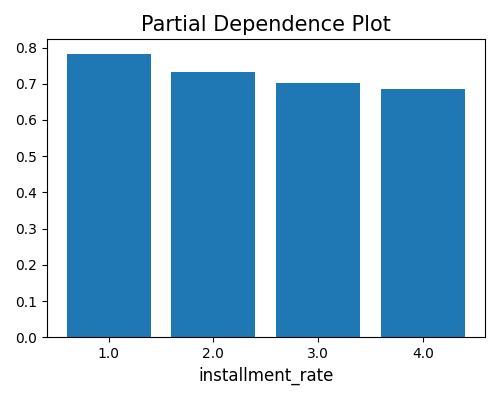

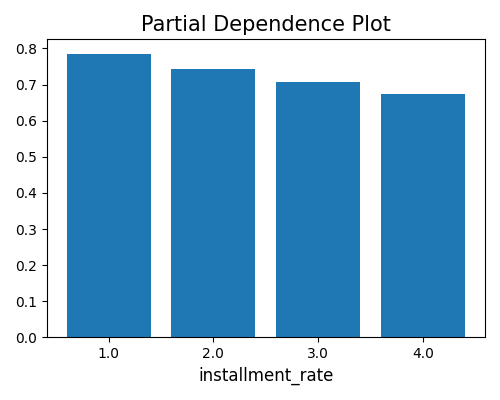

In [ ]:
#Partial Dependency Plot - installment_rate
exp.model_explain(model="XGB2", show="pdp", uni_feature='installment_rate',
                  grid_size=50, original_scale=True, figsize=(5, 4))

exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature='installment_rate',
                  grid_size=50, original_scale=True, figsize=(5, 4))

##Partial Dependency Plots - Interpretation

The effect of the duration feature was a little chaotic in the original model; the monotonicity constraint seems to have addressed that issue, as well as adjusting a more minor anomaly in the credit_history feature.

#Outcome Testing 1: WeakSpot

WeakSpots: Regions where the model doesn't perform well with respect to one or more features

WeakSpot testing used the examples found at the PiML [Weakspot: Classification](https://selfexplainml.github.io/PiML-Toolbox/_build/html/auto_examples/4_testing/plot_1_weakspot_cls.html#sphx-glr-auto-examples-4-testing-plot-1-weakspot-cls-py) page

##Weakspot Testing - Univariate - AUC Metric

Weak regions found for each predictor. The feature purpose tends to have more weak spots on both models that any other feature which signals the models tends to underperform or make incorrect predictions on purpose feature


### Status

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

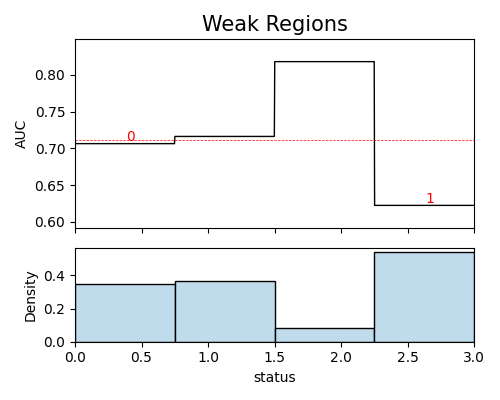

,[status,status),#Test,#Train,test_AUC,train_AUC,Gap
0,0.00,0.75,52,222,0.706605,0.839757,-0.133152
1,2.25,3.00,81,313,0.622585,0.819365,-0.196781


In [ ]:
#XGB2
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['status'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

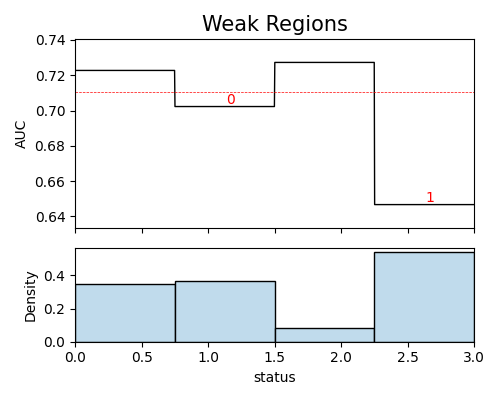

,[status,status),#Test,#Train,test_AUC,train_AUC,Gap
0,0.75,1.5,55,214,0.702285,0.689037,0.013248
1,2.25,3.0,81,313,0.646739,0.796173,-0.149434


In [ ]:
#Mono-XGB2
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['status'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

### Duration

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

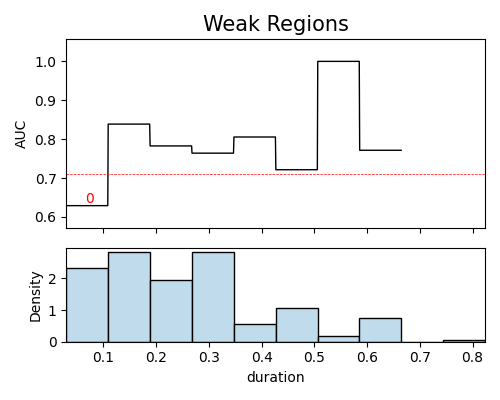

,[duration,duration),#Test,#Train,test_AUC,train_AUC,Gap
0,0.029412,0.108824,37,136,0.629032,0.880952,-0.25192


In [ ]:
#XGB2
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['duration'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

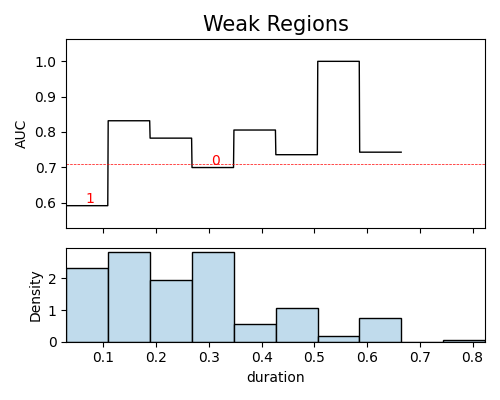

,[duration,duration),#Test,#Train,test_AUC,train_AUC,Gap
0,0.267647,0.347059,45,153,0.699353,0.828189,-0.128836
1,0.029412,0.108824,37,136,0.591398,0.848033,-0.256635


In [ ]:
#Mono-XGB2
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['duration'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data


### Credit History

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

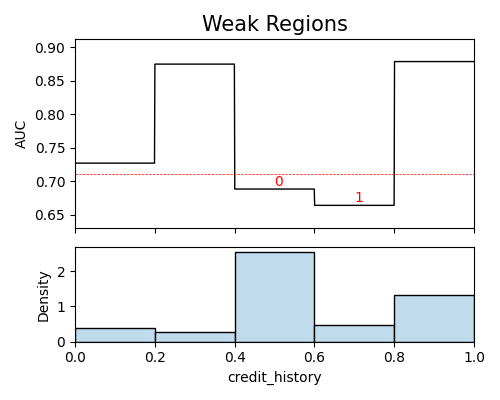

,[credit_history,credit_history),#Test,#Train,test_AUC,train_AUC,Gap
0,0.4,0.6,102,428,0.688625,0.815560,-0.126934
1,0.6,0.8,19,69,0.664286,0.821834,-0.157548


In [ ]:
#XGB2
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['credit_history'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

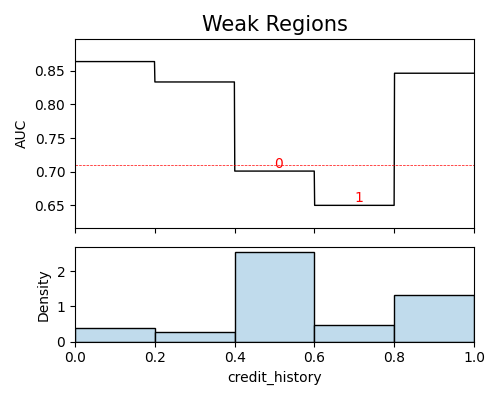

,[credit_history,credit_history),#Test,#Train,test_AUC,train_AUC,Gap
0,0.4,0.6,102,428,0.700922,0.798147,-0.097224
1,0.6,0.8,19,69,0.650000,0.763233,-0.113233


In [ ]:
#Mono-XGB2
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['credit_history'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

### Purpose

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

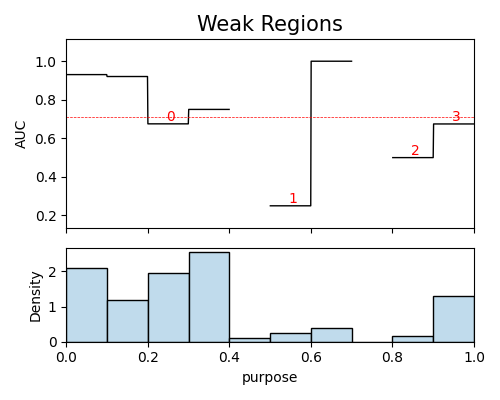

,[purpose,purpose),#Test,#Train,test_AUC,train_AUC,Gap
0,0.2,0.3,39,142,0.675134,0.794977,-0.119843
1,0.5,0.6,5,17,0.250000,0.871429,-0.621429
2,0.8,0.9,3,6,0.500000,NaN,NaN
3,0.9,1.0,26,83,0.674556,0.865047,-0.190491


In [ ]:
#XGB2
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['purpose'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

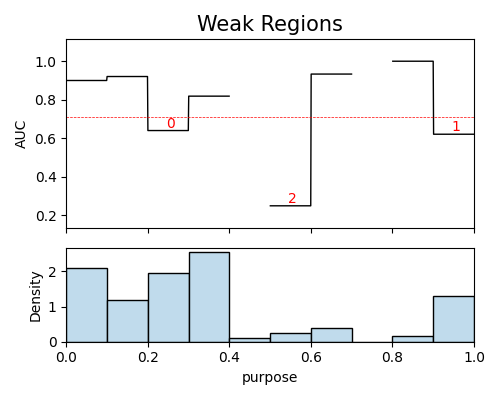

,[purpose,purpose),#Test,#Train,test_AUC,train_AUC,Gap
0,0.2,0.3,39,142,0.640374,0.766844,-0.126469
1,0.9,1.0,26,83,0.621302,0.833333,-0.212032
2,0.5,0.6,5,17,0.250000,0.678571,-0.428571


In [ ]:
#Mono-XGB2
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['purpose'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

### Installment Rate

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

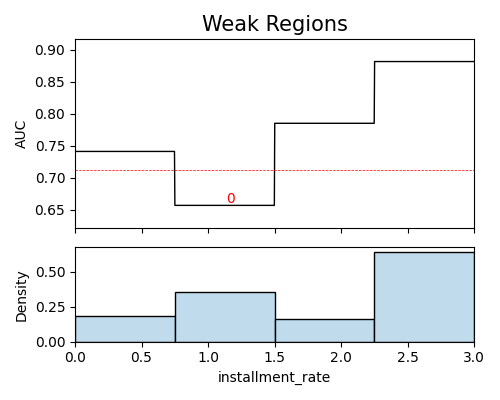

,[installment_rate,installment_rate),#Test,#Train,test_AUC,train_AUC,Gap
0,0.75,1.5,53,178,0.656863,0.843024,-0.186161


In [ ]:
#XGB2
results = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['installment_rate'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

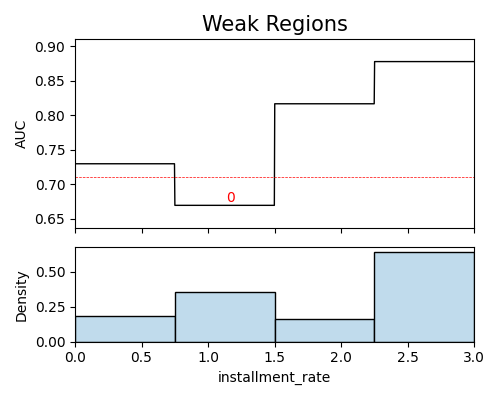

,[installment_rate,installment_rate),#Test,#Train,test_AUC,train_AUC,Gap
0,0.75,1.5,53,178,0.669118,0.79056,-0.121442


In [ ]:
#Mono-XGB2
results = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=['installment_rate'], threshold=1.1, min_samples=100,
                             metric="AUC", use_test=True, return_data=True, figsize=(5, 4))
results.data

##WeakSpot Testing - Summary of Results

https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/testing/weakspot.html

With the AUC metric, weak regions were found with respect to all predictors.  




#Outcome Testing 2: Robustness

Definition: Robustness means the degree to which a model performs similarly despite test examples somewhat different from the training set.

Robustness testing was completed using code from the PiML [Robustness: Classification](https://selfexplainml.github.io/PiML-Toolbox/_build/html/auto_examples/4_testing/plot_4_robustness_cls.html#sphx-glr-auto-examples-4-testing-plot-4-robustness-cls-py) page

## Robustness Testing - Accuracy Metric

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

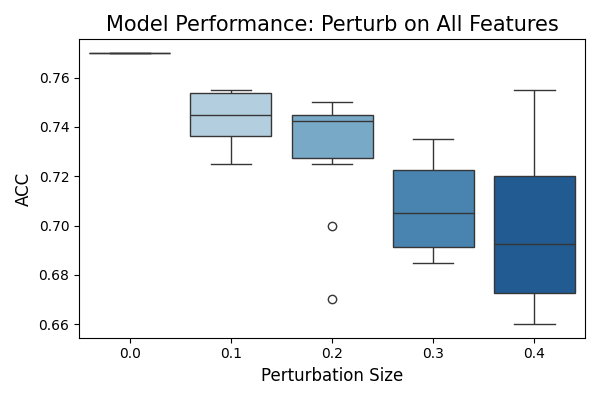

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="robustness_perf", figsize=(6, 4))

## Robustness Testing - AUC Metric

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

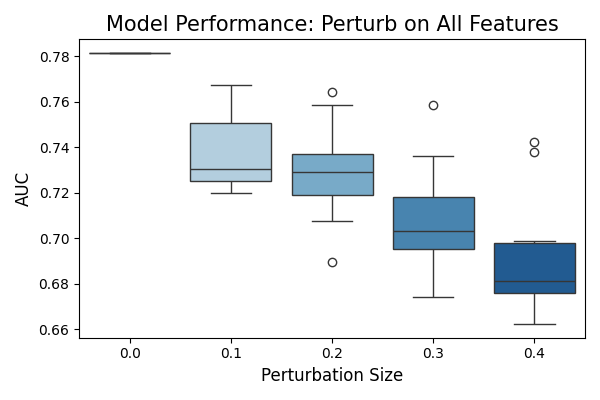

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="robustness_perf", metric="AUC", figsize=(6, 4))

## Robustness Testing - Summary of Results

https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/testing/robustness.html

While the model is not necessarily particularly robust, its performance does not decline catastrophically with perturbations in the range we tested for.  Performance falls steadily with the size of the perturbation, with no sudden, dramatic drops.  AUC drops substantially, but remains above 0.66 even with relatively large perturbations of 0.4.


#Outcome Test 3: Reliability

Definition: Reliability means the degree to which a model performs similarly on different test sets from the same distribution.

Used code from PiML's [Reliability: Classification](https://selfexplainml.github.io/PiML-Toolbox/_build/html/auto_examples/4_testing/plot_3_reliability_cls.html#sphx-glr-auto-examples-4-testing-plot-3-reliability-cls-py) page

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

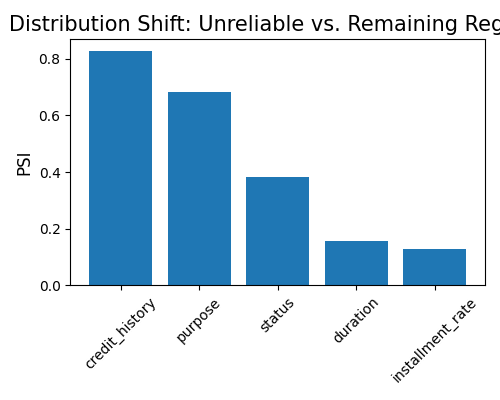

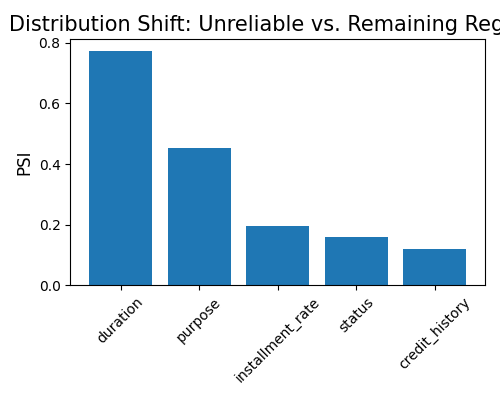

In [ ]:
exp.model_diagnose(model="XGB2", show="reliability_distance",
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))

exp.model_diagnose(model="Mono-XGB2", show="reliability_distance",
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))


## Marginal Uncertainty

For each feature, we charted XGB2 followed by Mono-XGB2

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

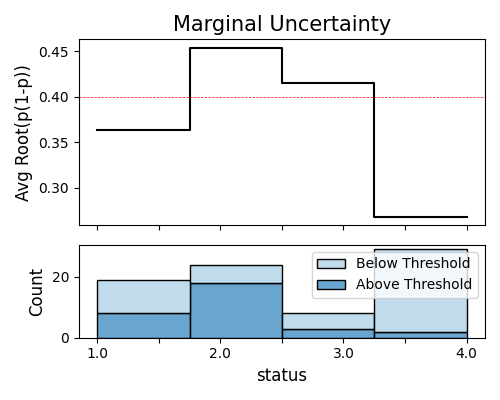

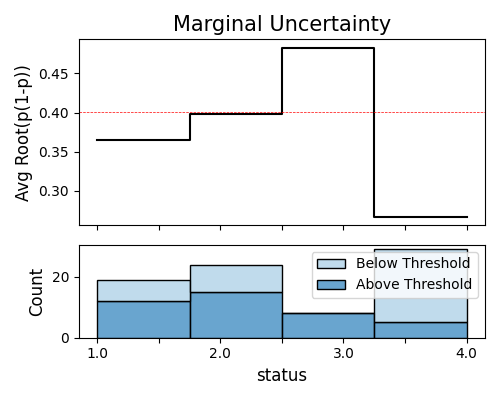

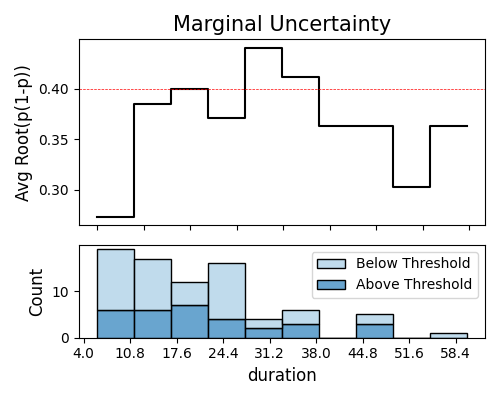

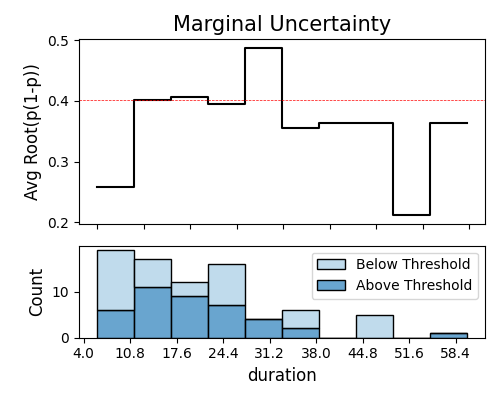

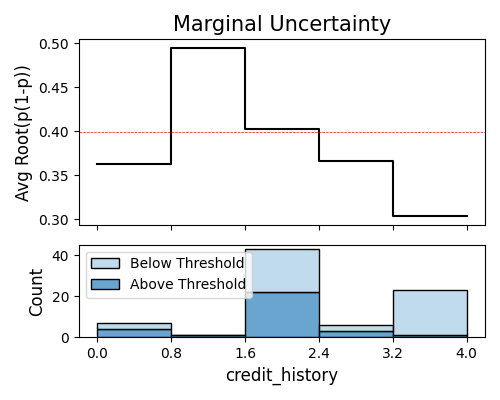

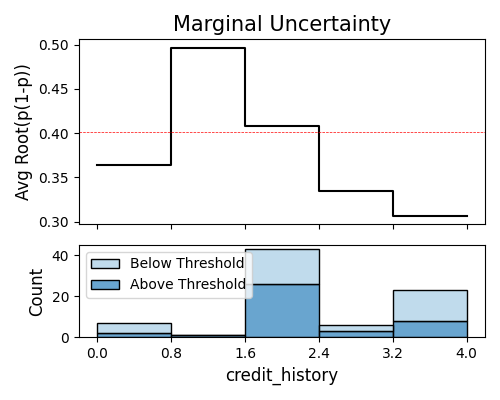

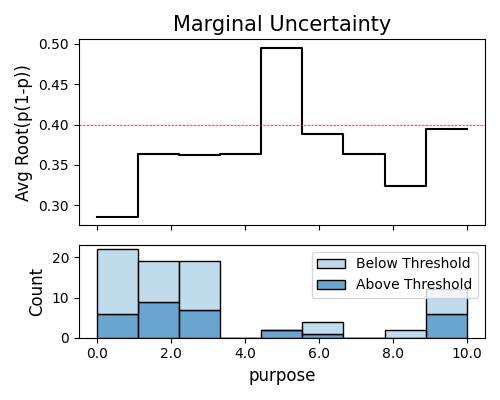

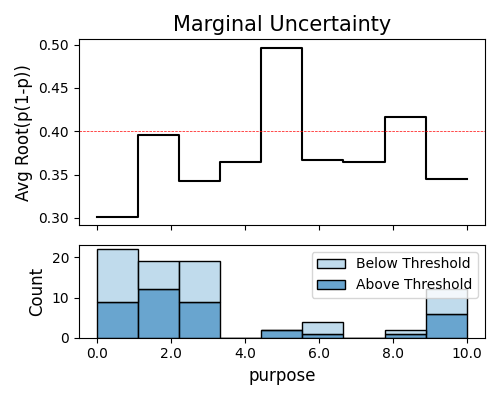

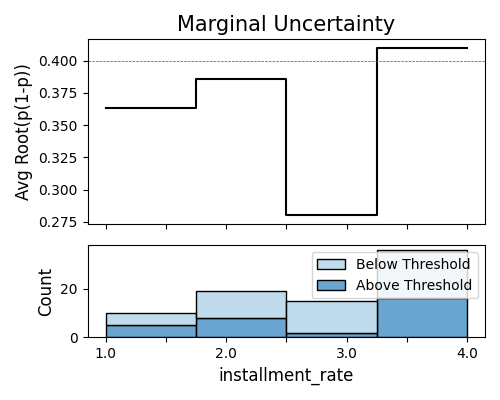

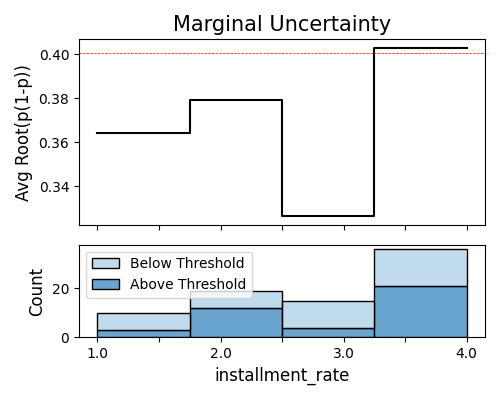

In [ ]:
for feature in prediction_features:
    exp.model_diagnose(model="XGB2", show="reliability_marginal",
                   show_feature=feature, bins=10, threshold=1.1,
                   original_scale=True, figsize=(5, 4))

    exp.model_diagnose(model="Mono-XGB2", show="reliability_marginal",
                   show_feature=feature, bins=10, threshold=1.1,
                   original_scale=True, figsize=(5, 4))




## Reliability Calibration

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

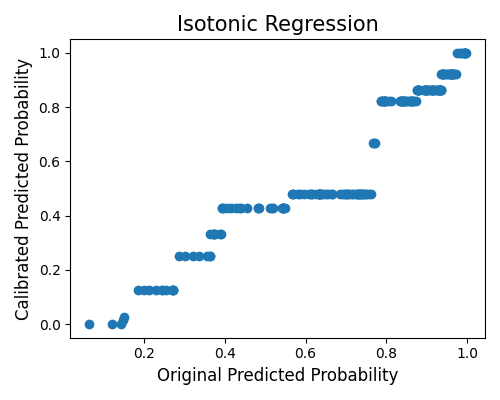

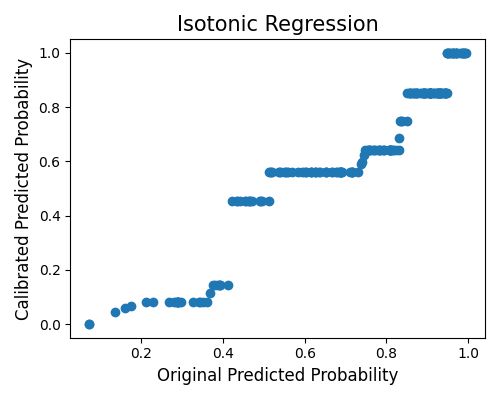

In [ ]:
exp.model_diagnose(model="XGB2", show="reliability_calibration", figsize=(5, 4))

exp.model_diagnose(model="Mono-XGB2", show="reliability_calibration", figsize=(5, 4))

## Reliability Performance

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

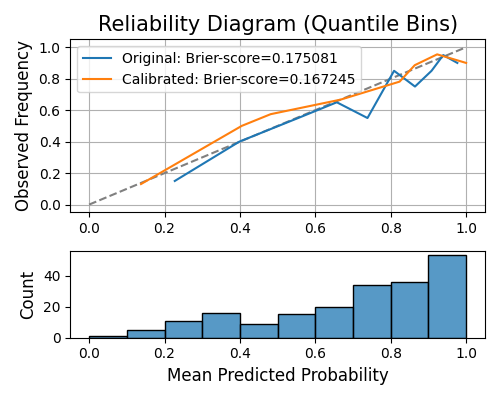

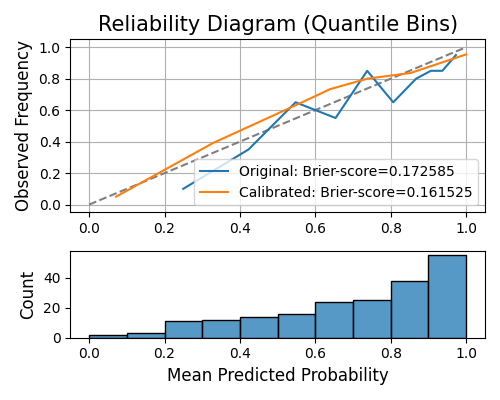

In [ ]:
exp.model_diagnose(model="XGB2", show="reliability_perf", figsize=(5, 4))

exp.model_diagnose(model="Mono-XGB2", show="reliability_perf", figsize=(5, 4))

## Reliability Testing - Summary of Results

https://selfexplainml.github.io/PiML-Toolbox/_build/html/guides/testing/reliability.html

The models demonstrate a high degree of reliability, performing consistently across different test sets drawn from the same distribution. The marginal uncertainty and calibration tests show that both models maintain their predictive performance across different subsets of the data.



#Model Choice & Justification

Which model should we use, and why?

Based on the detailed diagnostics, the Mono-XGB2 model demonstrates improved reliability and robustness. The monotonic constraint on the duration feature has led to more stable and interpretable relationships, enhancing the model's overall performance. The Mono-XGB2 model's better calibration, lower marginal uncertainty, and gradual performance decline with data perturbation make it a more reliable and robust choice for predicting credit risk.
